# Kapitel 10 - Gradient Descent

In [1]:
import sys
sys.path.append("../src/") 
from quiz import start_quiz
from utils import css_styling, hide_code
from functionplotter import plt_function
css_styling()

## 1. Kapitelübersicht <a class="anchor" id="1"/>

In diesem Kapitel wird das **Gradient Descent** (deutsch: **Gradientenabstieg**) Verfahren eingeführt. Zuvor wird für ein besseres Verständnis das **Newton-Raphson** Verfahren eingeführt und erläutert. Da dies das letzte Kapitel der Calculus-Tutorialreihe ist, wird am Ende des Kapitels ein Ausblick auf vertiefende und weiterführende Calculus-Themen geworfen sowie Empfehlungen für Themengebiete aus den Digital Humanities gegeben, die man mit dem in dieser Tutorialreihe erworbenem Wissen nun angehen kann.

TODO

<b>Abschnittsübersicht</b><br>

[1. Kapitelübersicht](#1)<br>
TODO

<b>Quizübersicht</b><br>
TODO

<b>Behandelte Themen</b><br>
- TODO

## 2. Newton-Raphson Verfahren  <a class="anchor" id="2"/>

Mit dem **Newton-Raphson** Verfahren können wir näherungsweise *Nullstellen*, *Schnittpunkte* von Funktionen oder *Wurzeln* berechnen. Wie auch im vorherigen Kapitel haben wir es hier mit **Approximationen** zu tun. Anstatt aber wie im vorherigen Kapitel eine komplexe Funktionen mithilfe einer Reihe von weniger komplexen Funktionen zu approximieren, approximieren wir hier nun verschiedene **Lösungen** von Funktionen (also das Finden von Wurzeln, Schnittpunkten oder Nullstellen).

<div class=digression>
    <b>Exkurs</b>: Simple Herleitung des Newton-Raphson Verfahren
    <br>
    <br>Das <b>Newton-Raphson</b> Verfahren wurde von Isaac Newton und Joseph Raphson entwickelt. Wie sie auf die Formel für das Newton-Raphson Verfahren kamen, wird in der ersten Hälfte dieses <a href="https://www.youtube.com/watch?v=JdMVcHUfAs0">Videos</a> erklärt.
</div>

### 2.1. Gründe für das Newton-Raphson Verfahren <a class="anchor" id="2-1"/>

Um nun zu verstehen, was das Newton-Raphson Verfahren im Detail macht und warum wir dieses benötigen, gucken wir uns nun ein Beispiel an. Gegeben sei die folgende Funktion:<br>

$f(x) = x^3 - 2x + 2$<br>

Die Ableitung der Funktion ist die folgende Funktion:<br>

$\frac{\partial f}{\partial x} = 3x^2 - 2$ &nbsp; [<sup>1</sup>](#fn1)<br>

Den Graphen der Funktion können Sie in der folgenden Code-Zelle plotten (in blau). Sie sehen, dass der Graph zwei **Wendepunkte** hat, also zwei Punkte, an denen sich die Art der Steigung (= Fallen oder Steigen) ändert.[<sup>2</sup>](#fn2) Der erste Wendepunkt ist ein **Maximum**, der zweite Wendepunkt ist ein **Minimum**. 


Nun kann es aber sein, dass wir den Graphen einer Funktion nicht einfach visualisieren können. Dies kann z.B. die folgenden Gründe haben:
- **Nicht genügend Rechenkraft unseres Computer**. Je komplexer eine Funktion wird, umso schwieriger wird es für den Computer, diese gut zu visualisieren. Unsere Beispielfunktion ist davon nicht betroffen, doch Sie können sich sicher vorstellen, wie kompliziert Funktionen werden können.
- **Zu hohe Dimensionalität**. Ein Problem, welches sehr schnell auftaucht, ist, dass unsere Funktionen zu viele Dimensionen haben und wir sie deshalb nicht visualisieren können. Bis jetzt hatten wir in unseren Beispielen nur Funktionen geplottet, die wir im 2D oder 3D Raum visualisieren können. Doch was wäre mit der Funktion $f(x,y,z,w,v)$? Diese hat fünf Variablen und man bräuchte 6 Dimensionen, um diese darstellen zu können. Dies ist mit dem menschlichen Verstand aber nicht möglich. 

Doch es ist auch möglich, bestimmte Probleme von Funktionen zu lösen, ohne dafür einen Graphen plotten zu müssen. Nehmen wir nun einmal an, wir wollen den **Schnittpunkt** der Funktion mit der **x-Achse** ermitteln. Wenn wir uns den Graphen in der folgenden Code-Zelle angucken, können wir sehr schnell sehen, dass dieser zwischen $1$ und $2$ liegt, da der Graph dort die x-Achse schneidet. Doch ohne den Graphen wird dies schwieriger. Um diesen Schnittpunkt zu berechnen, müssen wir $y=0$ setzen, also $0 = x^3 - 2x +2$ und nach $x$ auflösen.[<sup>3</sup>](#fn3) Während das für lineare Funktion relativ unkompliziert zu berechnen ist, kommen wir bei dieser Funktion schon an unsere Grenzen. Die Lösunggleichung würde folgendermaßen aussehen:<br>

$\frac{3^{\frac{2}{3}} \left(\frac{2}{3} + \frac{\left(3 \sqrt{57} + 27\right)^{\frac{2}{3}}}{9}\right)}{\sqrt[3]{\sqrt{57} + 9}} \approx -1.76929235423863$<br>


Wirklich schön ist das nicht und die Funktion ist in diesem Fall vergleichsweise einfach. Sie können sich sicher vorstellen, wie die Berechnungen aussehen, wenn die Funktionen komplexer werden.

<hr style="border: 0.1px solid black;"/>
<span id="fn1" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">1</sup>&nbsp; Wir haben hier die Notation für die partiellen Ableitungen verwendet, auch wenn wir es nicht unbedingt gebraucht hätten, da ja nur nach einer Variablen (hier: $x$) abgeleitet werden kann.</span><br>
<span id="fn2" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">2</sup>&nbsp; Wie man Wendepunkte ermittelt, kann in diesem <a href="https://www.mathebibel.de/wendepunkt-berechnen#:~:text=Graphisch%20betrachtet%20handelt%20es%20sich,in%20eine%20Linkskurve%20oder%20umgekehrt">Artikel</a> nachgelesen werden.</span><br>

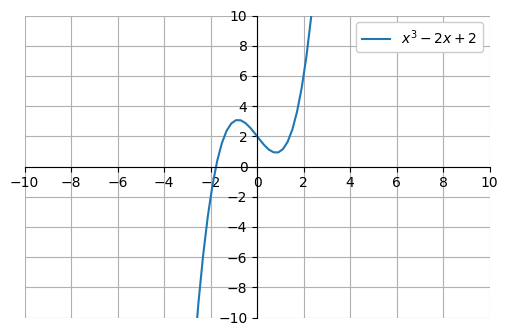

In [3]:
plt_function(name="newton_raphson_example", space=(-10.0, 10.0), tangent=False)

Doch es ist auch möglich, bestimmte Probleme von Funktionen zu lösen, ohne dafür einen Graphen plotten zu müssen. Nehmen wir nun einmal an, wir wollen den **Schnittpunkt** der Funktion mit der **x-Achse** ermitteln. Wenn wir uns den Graphen in der vorherigen Code-Zelle angucken, können wir sehr schnell sehen, dass dieser zwischen $-1$ und $-2$ liegt, da der Graph dort die x-Achse schneidet. Wir könnten nun das Koordinatensystem feiner darstellen und dann ablesen, dass der Schnittpunkt etwa bei $-1.77$ liegt. 

Doch ohne den Graphen wird dies schwieriger. Um diesen Schnittpunkt zu berechnen, müssen wir $y=0$ setzen, also $0 = x^3 - 2x +2$ und nach $x$ auflösen.[<sup>3</sup>](#fn3) Während das für lineare Funktion relativ unkompliziert zu berechnen ist, kommen wir bei dieser Funktion schon an unsere Grenzen. Die Lösunggleichung würde folgendermaßen aussehen:<br>

$\frac{3^{\frac{2}{3}} \left(\frac{2}{3} + \frac{\left(3 \sqrt{57} + 27\right)^{\frac{2}{3}}}{9}\right)}{\sqrt[3]{\sqrt{57} + 9}} \approx -1.76929235423863$<br>


Wirklich schön ist das nicht und die Funktion ist in diesem Fall vergleichsweise einfach. Sie können sich sicher vorstellen, wie die umfangreich die Berechnungen werden, wenn die Funktionen noch komplexer sind. Ein weiteres Problem, was wir haben, wenn wir den Graphen nicht sehen, ist, dass wir nicht wissen, *wieviele* Schnittstellen die Funktion mit der x-Achse hat. 

Was also tun? Wir nutzen die uns bereits bekannten **Approximationen**, indem wir uns der Lösung annähern. Dies tun wir, indem wir einen Punkt nehmen und den in unsere Funktion eingeben. Nur welchen Punkt nehmen wir? TODO. 

Nehmen wir nun den x-Wert $-2$ uns setzen diesen in unsere Gleichung ein:

$f(x) = (-2)^3 - 2 \cdot -2 + 2 = -2$<br>

Wenn wir den den Wert in unsere Ableitung einsetzen, erhalten wir einen positiven Wert, was bedeutet, dass der Graph in diesem Punkt steigt.

$\frac{\partial f}{\partial x} = 3(-2)^2 - 2 = 10$


TODO WEITER


<hr style="border: 0.1px solid black;"/>
<span id="fn3" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">3</sup>&nbsp; Wie man den Schnittpunkt einer Funktion mit der x-Achse ermittelt, kann in diesem <a href="https://de.serlo.org/mathe/2195/schnittpunkte-mit-den-koordinatenachsen">Artikel</a> im Detail nachgelesen werden.</span><br>
<span id="fn4" style="font-size:8pt; line-height:1"><sup style="font-size:5pt">4</sup>&nbsp; Setzt man eine x-Koordinate $x_0$ eines Punktes in die erste Ableitung ein, kann man je nach Vorzeichen des Ergebnis bestimmen, ob der Graph <b>steigt</b> ($f'(x_0) > 0$), <b>fällt</b> ($f'(x_0) < 0$) oder <b>stagniert</b>, also weder fällt noch steigt ($f'(x_0) = 0$). Weitere Informationen können in diesem <a href="https://www.mathebibel.de/erste-ableitung">Artikel</a> nachgelesen werden.</span><br>

In [7]:
plt_function(name="newton_raphson_example", space=(-10.0, 10.0), startvalue=-2., tangent=True)

interactive(children=(FloatSlider(value=-2.0, continuous_update=False, description='p_x', max=10.0, min=-10.0,…

<table id="centertable">
    <tr>
        <th>x</th>
        <th>1</th>
        <th>2</th>
        <th>3</th>
        <th>4</th>
    </tr>
    <tr>
        <td>y</td>
        <td>6</td>
        <td>10</td>
        <td>14</td>
        <td>18</td>
    </tr>
</table> 

TODO: anfangen mit newton-raphson methode (video 1, woche 5)
- sagen, dass wir nun alles von vorher brauchen
- wieso brauchen wir die methode? zu viele dimensionen
- was folgt auf die methode? (gradient descent)
    - warum? probleme von newton raphson
    - wichtig für mehrere variablen
- Konzept: **Iteration**
- ICH: Code schreiben, der mir bei Beispielgraph erlaubt, Punkte einzusetzen und wieder Linien zu malen
- ICH: das hilft: https://www.youtube.com/watch?v=JdMVcHUfAs0

- TODO: zu Sattelpunkten und lokalen Minima: https://datascience.stackexchange.com/questions/22853/local-minima-vs-saddle-points-in-deep-learning
- TODO: auch vllt sandpit von coursera woche 2 nehmen? in video "The sandpit" wird auch erläutert, dass die bergsteiger metapher ein paar "misleading features" hat (Man kann z.B. teleportieren)
- TODO: auch sigmoid funktion hier nochmal einführen? hat mehrere coole eigenschaften, wie:
    - alle zahlen werden zwischen 0 und 1
    - Ableitung ist einfach: $\frac{d\sigma}{dx} = \sigma(x) \cdot (1 - \sigma(x))$ &rarr; das zeigen!!

In [3]:
def f(x):
    return x**3 - 2*x + 2


x = -2
print(f(-2))

x - (-2/10)

-2


-1.8

## 3. Gradient Descent  <a class="anchor" id="3"/>

TODO: Optimierungsverfahren<br>
TODO: Stochastic gradient desscent?

TODO: https://karpathy.medium.com/yes-you-should-understand-backprop-e2f06eab496b &rarr; das erwähnen in einem Abschnitt zu "wozu brauche ich das alles?"

## 4. Weitere Themen und Anwendungsfälle  <a class="anchor" id="4"/>

Die Themen, die wir in dieser Calculus-Tutorialreihe besprochen haben, haben in vielen Bereichen der Digital Humanities mal mehr und mal weniger prominenten Anwendungsfälle. Der wohl wichtigste Anwendungsfall ist aber beim Training von **Neuronalen Netzen** aus dem Bereich des **Deep Learning**. Seit einigen Jahren haben diese Neuronalen Netze durchbrechende Erfolge geleistet und haben die **KI-Forschung** unglaublich stark geprägt. Aus diesem Grund werden Sie in Ihrem Studium mit einer sehr hohen Wahrscheinlichkeit diesen Netzen begegnen. Dort werden Sie Bibliotheken kennen lernen, mit denen Sie diese Netze effektiv umzusetzen und für die Lösung verschiedenster Probleme einsetzen werden können. Die Mathematik, die Sie hier gelernt haben, hilft Ihnen dabei zu verstehen, wie Neuronale Netze im Kern funktionieren und wie ein Training dieser Netze funktioniert. Sollten Sie Interesse haben, sich dem Thema "Deep Learning" in Eigenarbeit anzunähern, habe ich zwei Empfehlungen für Sie:
- **Deep Learning Specialization (Coursera)** [<a href="https://www.coursera.org/specializations/deep-learning">Link</a>]. Dieser Online-Kurs von Deep Learning Legende *Andrew Ng* ist einer der bekanntesten und besten Einsteigerkurse zum Thema "Deep Learning". Zu finden ist dieser auf der Lernplattform *Coursera*, bei der Inhalte zu verschiedensten Themen mithilfe von Videos, Übungsquizzen und -aufgaben vermittelt werden. Sie werden dort die wichtigsten Inhalte zum Deep Learning vermittelt bekommen. Sie können diesen Kurs kostenlos besuchen, wenn Sie diesen als Gasthörer bearbeiten. Wenn Sie diesen Kurs bezahlen (<u>Hinweis</u>: nach Studentenrabatte oder -aktionen Ausschau halten), können Sie ein Zertifikat erhalten und viele wichtige Quizze und Aufgaben lösen und Feedback für die Lösungen erhalten. Die Zeit, wie und wann Sie diesen Kurs bearbeiten, bleibt Ihnen überlassen, Sie lernen Inhalte nur über das Selbststudium. Der Kurs setzt etwas Mathematik im Bereich von Calculus und Linearer Algebra voraus, welche Sie aber mit dieser Tutorialreihe vermittelt bekommen haben sollten. 
- **KINSLEY, Neural Networks from Scratch in Python** [<a href="https://nnfs.io/">Link</a>]. Im oben genannten Deep Learning Kurs wird man zu einem Zeitpunkt simple Neuronale Netze per Hand in Python implementieren. Diese Herangehensweise an Neuronale Netze fand ich persönlich sehr ansprechend und mein Verständnis von Neuronalen Netzen aber auch der Bibliothek `NumPy` konnte dadurch erweitert werden. Das Problem, dass sich m.E. beim Lernen und der Anwendung von Deep Learning ergibt, ist das man durch die sehr guten Python-Bibliotheken zwar Neuronale Netze einfach und schnell implementieren kann, jedoch den Bezug zu dem, was ein Neuronales Netz eigentlich macht, verliert. Doch genau dieses Verständnis kann unglaublich hilfreich sein. Ich empfehle deshalb das Buch des Python-YouTubers *sentdex*, der m.E. das beste Buch zu diesem Thema veröffentlicht hat, da es sehr einsteigerfreundlich, aber zeitgleich auch sehr informativ und gut aufbereitet ist. Dieses Buch ist nicht kostenlos, die Tutorialreihe in Form von Videos jedoch schon: <a href="https://www.youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3">Link zur Playlist</a>. Die Playlist ist aktuell noch nicht abgeschlossen (Stand März 2021), wird aber in unregelmäßigen Abständen aktualisiert. Das Buch/die Playlist kann am besten entweder nach oder während dem Besuchen eines Deep Learning Kurses (Coursera-, Uni- oder ein anderer Kurs) durchgearbeitet werden oder aber in Zusammenhang mit anderen Lernmaterialien.  

TODO: hier kapitel mit "was nun?" oder so
- die sachen sagen, die noch von coursera fehlen
    - lagrange multipliers: https://jonathan-hui.medium.com/machine-learning-lagrange-multiplier-dual-decomposition-4afe66158c9
- machine learning dinge reingucken
    - lineare regression
    - klassifizierungsverfahren ...
- deep learning kurs von coursera empfehlen
- integrale?